In [1]:
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import math as m
%pylab inline



HTML('''<script>

code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

Populating the interactive namespace from numpy and matplotlib


![title](data/TITLE.png)

# Motivation for Being in the Complex Plane

In many instances in geophysical digitial signal processing we apply [integral transforms](https://en.wikipedia.org/wiki/Integral_transform) that project our geophysical data from one domain to another.  The reason why we do this is that many of the problems we are trying to solve (e.g., filtering out unwanted components, signal-noise separation, etc) are easier to solve in the transform domain. Ideally, the integral transform is **invertible** in the sense that it has an **inverse transform** that allows you to bring your (filtered, separated, etc) data back to the original domain without losing any of its information content.

### Forward and inverse integral transforms

Mathematically, we may write the **integral transform** as the following:


$$(Tg)(u) = \int_{t_1}^{t_2} g(t)\, K(t,u) \,\mathrm{d}t, \tag{1}$$

where the input is a function $g(t)$ of variable $t$, and the output is another function $Tg$ of transform variable $u$. Often we symbolize the output of this transform as $\widehat{G}(u)$.  There are numerous useful integral transforms, where each is specified by a choice of the [integration kernel function](https://en.wikipedia.org/wiki/Integral_transform) $K(u,t)$ of two variables - $t$ and $u$ - as well as the limits applied - $t_1$ and $t_2$.

Some kernels have an associated inverse kernel $K^{-1}(t,u)$ which roughly speaks delivers an inverse transform:

$$ g(t) =  \int_{u_1}^{u_2}  (Tg)(u) \, K^{-1}(t,u) \,\mathrm{d}u. \tag{2} $$

when applied with the appropriate limits $u_1$ and $u_2$. There are many [different integral transforms](https://en.wikipedia.org/wiki/Integral_transform#Table_of_transforms) that are used across a whole range of the physical sciences and mathematics.

### Fourier and Inverse Fourier Transform Pair

The most important set of integral transforms that you will likely experience over your career is the Forward and Inverse Fourier Transform pair (denoted $\mathcal{F}$ and $\mathcal{F}^{-1}$).  By defining $u=f$, we see that the kernel functions for these transforms, $K_{\mathcal{F}}(f,t)$ and $K^{-1}_{\mathcal{F^{-1}}}(f,t)$, are given by:

$$K_{\mathcal{F}}(f,t) = e^{-i2\pi ft} \quad \mathrm{and} \quad K^{-1}_{\mathcal{F}^{-1}}(f,t)=e^{i 2\pi f t}. \tag{3}$$

In this course, we will sometimes use the **angular frequency** definition $\omega = 2\pi f$ so that we may write 

$$K_{\mathcal{F}}(\omega,t) = e^{-i \omega t} \quad \mathrm{and} \quad K^{-1}_{\mathcal{F}^{-1}}(\omega,t)=e^{i\omega t}. \tag{4}$$

When we include the limits $t_1=u_1=-\infty$ and $t_2=u_2=\infty$ we may write:

$$\widehat{G}(\omega)\equiv (\mathcal{F}g)(\omega) = \int_{-\infty}^{\infty} g(t) \, e^{-i \omega t} \, \mathrm{d}t \quad \mathrm{and} \quad g(t) =  \int_{-\infty}^{\infty}  (\mathcal{F}g)(\omega) \, e^{i\omega t} \,\mathrm{d}\omega 
=  \int_{-\infty}^{\infty} \widehat{G}(\omega) \, e^{i\omega t} \,\mathrm{d}\omega. \tag{5}$$

### And in practice?

It is instructive to ask yourself what is the integral Fourier Transform actually doing algorithmically speaking? Basically, the algorithm to compute this is doing the following pseudo-code operation:

* **OUTPUT LOOP:** For a value of $\omega_0$ in the range of $\omega$ (from $\omega_1=-\infty$ to $\omega_2=\infty$) do:
    * **INPUT LOOP:** For a value of $t_0$ in the range of $t$ (from $t_1=-\infty$ to $t_2=\infty$) do:
        1.  Extract a value of $g(t_0)$
        2. Multiply this value by the value of the complex phasor $e^{-i\omega_0 t_0}$ for the associated $[t_0,\omega_0]$ pair.
        3. Add the result to the output contribution of the $(\mathcal{F}g)(\omega_0)$

(a) Random $g(t)$ time series | Illustration of Fourier Kernel in the Complex Plane
- | - 
<img src="Fig/F_of_T.png" alt="Drawing" style="width: 450px;"/> | <img src="Fig/UNIT_CIRCLE.png" alt="Drawing" style="width: 550px;"/>

### So we're done, right?

The above Fourier Transform process looks pretty straightforward to compute.  However, there are a number of fundamental questions that need to be addressed:

(1) Does the formulation work for all $g(t)$?
   * **NO!** There are some restrictions on the types of $g(t)$ to which we can apply the Fourier Transform. For example, does it have "finite" (good!) or "infinite" (bad!) energy in the signal"?
    
    
(2) Is it possible to specify some $g(t)$ for which the Fourier Transform "fails"?
   * **YES!** It is actually very easy to specify a function that would "fail" - e.g., $g(t) = e^{-t} (1-t)^{-1}$.  This is quite common when we are using designer functions (i.e., "filters") to do specific filtering tasks. 
    
    
(3) Are we able to analyze these types of signals?
   * **YES!** Just because a signal is not well defined on the unit circle in the complex plane does not mean we have to give up.  We have to expand our ability to analyze signals in complex plane beyond the unit circle.  Doing so leads to some course material that requires us to be comfortable with complex numbers and some of the fundamental principles of complex analysis.  Hopefully, you have encountered these topics in your previous courses and just need a short review.

# Complex Numbers: A Review

You have probably encountered the expression $i=\sqrt{-1}$ with the imaginary unit many times before - likely first with certain solutions to the quadratic equation:

$$ax^2+bx+c=0, \tag{6}$$

given by

$$x=\frac{-b \pm \sqrt{b^2-4ac}}{2a}. \tag{7}$$

When $b^2 < 4ac$ and we can find no real number equal to x.  The solutions in this case are termed **complex numbers**.  We have also assumed the existence of certain arithmetic operations on complex number that largely parallel our experience with real numbers (generally due to some sort of *mathematical symmetry*). However, we do not need to delve into such a detailed discussion for this course.

### Elementary Arithmetic

We first consider simple powers of the imaginary unit $i=\sqrt{-1}$:

* $i^0 = 1$
* $i^1 = i$
* $i^2 = \sqrt{-1}\sqrt{-1} = -1$
* $i^3 = i^2i=-i$
* $i^4 = i^2 i^2=(-1)(-1)=1$
* $i^5 = i$

<div class="alert alert-info" role="alert">
Note that **squaring** $i$ causes an effective positive rotation of the output. Applying a **square root or other fractional power** will naturally cause a negative rotation of the output.
</div>

When performing the operations of addition, subtraction, multiplication and division we treat $i$ as though it were an algebraic constant.  For example, if $z_1=3-2i$ and $z_2=2-i$ then:

$$\begin{eqnarray}
{\rm Addition:}\quad z_1+z_2 = (3+2i)+(2-i) &=& 5+i \\
{\rm Subtraction:}\quad  z_1-z_2=(3+2i)-(2-i) &=& 1+3i \tag{9}\\
{\rm Multiplication:}\quad  z_1z_2=(3+2i)(2-i)  &=& 6-3i+4i-2i^2 = 6+i+2 = 8+i\\ 
\end{eqnarray}$$

Division requires remembering a simple trick.  To compute $\frac{z_1}{z_2}=\frac{3+2i}{2-i}$ we must multiply both the numerator and denominator by the **complex conjugate** (i.e., if $z=a+ib$ then $\overline{z}=\overline{a+ib} = a-ib$ where $[a,b]\in \Re$ and the overbar indicates a complex conjugate).  Thus,

$${\rm Division:}\quad \frac{z_1}{z_2} = \frac{3+2i}{2-i} = \frac{(3+2i)(2+i)}{(2-i)(2+i)} = \frac{4+7i}{5}. \tag{10}$$ 

This is also called **rationalizing the denominator**.

We often want to extract out just the real or imaginary components of a complex number, which is written notationally with the **real and imaginary operators**, $\Re$ and $\Im$, respectively. Thus, if $z=a+ib$ we have the following:

$$\Re(z)=a \tag{10a}$$ 
and
$$\Im(z)=b \tag{10b}$$

Note that the result of either operation is a **real number**.

### QUICK PROBLEMS:

(1) Let $z=3-3i$ and $w=1+\sqrt{3}i$.  Find the result of the following operations:

   (a) $z+w$
   
   (b) $z-w$
   
   (c) $z\,w$
   
   (d) $z\,/\,w$

Let's test our answers using the **sympy** package (symbolic python):

In [19]:
# . . Since the variables are not numbers by symbols
# . . I've used python symbolic package 'sympy' to complete the tests
import sympy as sm
z = 3-           3j;
w = 1+sm.sqrt(3)*1j;

# . . Now evaluate as print statements
print('Q1a: z+w=',z+w)
print('Q1b: z-w=',z-w)
print('Q1c: z*w=',z*w)
print('Q1d: z/w=',z/w)

Q1a: z+w= 4.0 - 3.0*I + 1.0*sqrt(3)*I
Q1b: z-w= 2.0 - 3.0*I - 1.0*sqrt(3)*I
Q1c: z*w= (1 + 1.0*sqrt(3)*I)*(3.0 - 3.0*I)
Q1d: z/w= (3.0 - 3.0*I)/(1 + 1.0*sqrt(3)*I)


(2) Let $z=a+ib$ and $w=c+id$, where $[a,b,c,d] \in \mathcal{R}$ (i.e. are real numbers).  Show that:

   (a) $\overline{z+w} = \overline{z}+\overline{w}$
   
   (b) $\overline{z-w}=\overline{z}-\overline{w}$
   
   (c) $\overline{z\,w}=\overline{z} \,\overline{w}$
   
   (d) $\overline{z\,/\,w} = \overline{z} \, / \, \overline{w}$
   
Let's again test our answers using python:

In [16]:
# . . Since the variables are not numbers by symbols
# . . I've used python symbolic package 'sympy' to complete the tests
from sympy import symbols

# . . Let's define all of the required symbols
a,b,c,d,z,w =symbols('a b c d z w')

z = a+1j*b
w = c+1j*d

# . . NOTE: Python uses the '==' operator to test equality
print('Test 2a')
print('z1=conj(z+w)      =',np.conj(z+w))
print('z2=conj(z)+conj(w)=',np.conj(z)+np.conj(w))
print ('Does z1=z2?',np.conj(z+w)==np.conj(z)+np.conj(w))
print('')
print('Test 2b')
print('z1=conj(z-w)      =',np.conj(z-w))
print('z2=conj(z)-conj(w)=',np.conj(z)-np.conj(w))
print ('Does z1=z2?',np.conj(z-w)==np.conj(z)-np.conj(w))
print('')
print('Test 2c')
print('z1=conj(z*w)      =',np.conj(z*w))
print('z2=conj(z)*conj(w)=',np.conj(z)*np.conj(w))
print ('Does z1=z2?',np.conj(z*w)==np.conj(z)*np.conj(w))
print('')
print('Test 2d')
print('z1=conj(z/w)      =',np.conj(z/w))
print('z2=conj(z)/conj(w)=',np.conj(z)/np.conj(w))
print ('Does z1=z2?',np.conj(z/w)==np.conj(z)/np.conj(w))

Test 2a
z1=conj(z+w)      = conjugate(a) - 1.0*I*conjugate(b) + conjugate(c) - 1.0*I*conjugate(d)
z2=conj(z)+conj(w)= conjugate(a) - 1.0*I*conjugate(b) + conjugate(c) - 1.0*I*conjugate(d)
Does z1=z2? True

Test 2b
z1=conj(z-w)      = conjugate(a) - 1.0*I*conjugate(b) - conjugate(c) + 1.0*I*conjugate(d)
z2=conj(z)-conj(w)= conjugate(a) - 1.0*I*conjugate(b) - conjugate(c) + 1.0*I*conjugate(d)
Does z1=z2? True

Test 2c
z1=conj(z*w)      = (conjugate(a) - 1.0*I*conjugate(b))*(conjugate(c) - 1.0*I*conjugate(d))
z2=conj(z)*conj(w)= (conjugate(a) - 1.0*I*conjugate(b))*(conjugate(c) - 1.0*I*conjugate(d))
Does z1=z2? True

Test 2d
z1=conj(z/w)      = (conjugate(a) - 1.0*I*conjugate(b))/(conjugate(c) - 1.0*I*conjugate(d))
z2=conj(z)/conj(w)= (conjugate(a) - 1.0*I*conjugate(b))/(conjugate(c) - 1.0*I*conjugate(d))
Does z1=z2? True


## The Complex Plane

We are familiar with the real line as a geometric device for visualizing real numbers.  Since the complex number $z=x+iy$ is a two dimensional item, it is not surprising that many consider complex numbers as points on a plane.  Thus the point $z=3+4i$ is represented by:

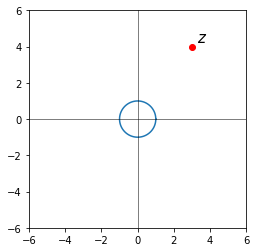

In [24]:
# . . Express Complex Number
z = 3+4j
a = array([z])

# . . Plot unit circle
t = linspace(0,2*pi,101)
plot(cos(t),sin(t))

# . . Plot data
plot(a.real, a.imag,'ro')

# . . Make box bigger
axes().set_aspect('equal')
m = max(max(abs(a.real)),max(abs(a.imag)))
xlim(-6,6),ylim(-6,6)

# . . Draw horizontal and vertical axes
plot([0,0],[-6,6],'k',linewidth=0.5)
plot([-6,6],[0,0],'k',linewidth=0.5)

# . . Annotate plot with labels
text(z.real+0.25, z.imag+0.25,'$z$',fontsize=15)
show()

where the blue **unit circle** is included for reference.

This point can be thought as having Cartesian coordinates $[x,iy]=[3,4]$ or as the vector drawn from the origin to this point.  The complex number $z=3+4i$ can also be defined by **polar coordinate** variables, $r$ and $\theta$. Recall that for $z=x+iy$ we have the following coordinate transformation:

**Forward (Cartesian to Polar)**

$$r = \sqrt{x^2+y^2} \tag{11a}$$
$$\theta = {\rm atan}\left(\frac{y}{x}\right) \tag{11b}$$  [Note: this is sometimes called atan2 in programming languages and requires two inputs - atan2(y,x)]

** Inverse (Polar to Cartesian)**
$$x = r \, {\rm cos}\, \theta\tag{11c}$$
$$y = r \, {\rm sin} \,\theta\tag{11d}$$

Thus, for the example $z=3+4i$ we have $r=\sqrt{3^2+4^2}=5$ and $\theta=\mathrm{atan}(4/3) = 0.93$ radians.  As in analytic geometry $\theta$ is not unique and we can add to $\theta$ any multiple of $2\pi$ radians:

$$\theta = 0.93+2\pi n,\quad n=0,\pm 1,\pm 2, ... \tag{11e}$$

We often call $r$ the **modulus** of $z$ and denote it by $|z|$.  The angle $\theta$ is called the **argument** of $z$ and is denoted $arg(z)=\theta$ or sometimes just $\angle(z)=\theta$.

It would come as no surprise that complex numbers can be represented by vectors, and that the geometric description of addition and subtraction of vectors is similar to that you would have experienced in other courses.  

To help you visualize the unit circle, here is a diagram with various key angles:

<img src="Fig/Unit_circle_angles.svg" width="350">
** Figure 1. Illustrating various key angles in unit circle (these would be good to memorize!).**

### QUICK PROBLEMS

(3) Express the following numbers in the form $re^{i\theta}$ with $r>0$ and $0\le\theta<2\pi$.

* $5i$
* $-7+7i$
* $-4-4\sqrt{3}i$
* $-1$

(4) Express the following numbers in the form $z=x+iy$

* $2e^{i3\pi}$
* $e^{i13\pi/4}$
* $7e^{-i\pi/6}$
* $e^{-i\pi/2}$

### Regions in the Complex Plane

In this course we will sometimes discuss **regions within the complex plane**.  For example: 
* (1) a disk contained within the unit circle centered at $c=1+2i$
* (2) the complement of the disk in (1)
* (3) the right half plane 
* (4) the upper half plane

Let's again use the sympy library to plot out these regions (though it is difficult to visually see if the sets are open or closed).  

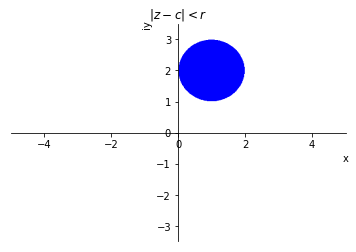

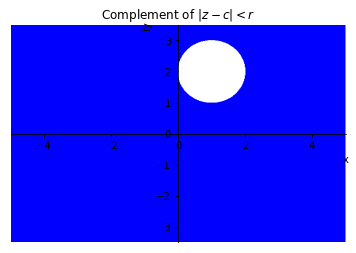

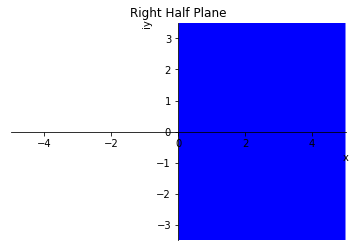

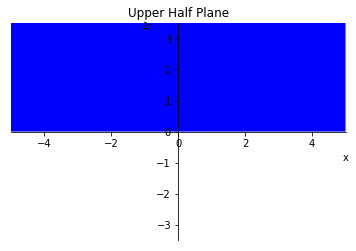

In [30]:
## . . NOTE: To do this example you need to install the sympy library
## . . conda install sympy
from sympy import plot_implicit, symbols, Eq, And
import sympy.plotting as syp
import matplotlib.pyplot as mpl

## . . Define x and iy symbolically
x,iy = symbols("x iy")

## . . Plot the regions using the Sympy plot_implicit function that can take inequalities
plot_implicit((x-1)**2+(iy-2)**2 <1,(x,-5,5),(iy,-3.5,3.5),title='$|z-c|<r$')
plot_implicit((x-1)**2+(iy-2)**2 >1,(x,-5,5),(iy,-3.5,3.5),title='Complement of $|z-c|<r$')
plot_implicit(x >0,(x,-5,5),(iy,-3.5,3.5),title='Right Half Plane')
plot_implicit(iy>0,(x,-5,5),(iy,-3.5,3.5),title='Upper Half Plane')

## . .  Look at the figures
mpl.show()

Note that there is a difference between an **open set** and a **closed set**.  An open set is a 2D region with the boundary points removed.  For example, the inequality $|z|<r$ would be an open set while $|z|\le r$ would be a closed set.

### QUICK PROBLEMS:

(5) What would the following regions look like:

   * An annulus defined by $r < | z-c | < R$


   * A infinite open sector defined by $\alpha < arg(z) < \beta$


   * A finite open sector defined by $\alpha < arg(z) < \beta$ and $r<|z|<R$


(6) Describe the following regions:

   * $|3z-6|\le 9$


   * $\left|\frac{z-1}{1+z}\right|<1$


   * $|z| \le |1-z|$

## The Complex Exponential

In previous courses you would have seen that functions of $e^x$, $\mathrm{sin} \, \theta $ and $\mathrm{cos} \,\theta $ can be expanded in power series:

$$e^x = 1 + \frac{x}{1!} + \frac{x^2}{2!}+ \frac{x^3}{3!} + \frac{x^4}{4!}+ \mathcal{O}(x^5) \tag{12}$$

$$\mathrm{sin} \, \theta = \theta - \frac{\theta^3}{3!} + \frac{\theta^5}{5!} - \frac{\theta^7}{7!} + \frac{\theta^9}{9!} + \mathcal{O}(x^{11})\tag{13}$$

$$\mathrm{cos} \, \theta = 1 - \frac{\theta^2}{2!} + \frac{\theta^4}{4!}- \frac{\theta^6}{6!}+ \frac{\theta^8}{8!} + \mathcal{O}(x^{10}) \tag{14}$$

where, e.g., $\mathcal{O}(x^5)$ means "terms of order $x^5$ and greater", and the $!$ operator is factorial. If we now set $x=i\theta$ and substitute this into $e^x$ we get:

$$
\begin{eqnarray}
e^{i\theta} &=& 1 + \frac{{i\theta}}{1!} + \frac{({i\theta})^2}{2!}+ \frac{({i\theta})^3}{3!}+ \frac{({i\theta})^4}{4!}+ \mathcal{O}\left(x^{5}\right) \\
\, &=&1 + \frac{{i\theta}}{1!} - \frac{({\theta})^2}{2!}- \frac{i({\theta})^3}{3!}+ \frac{({\theta})^4}{4!} + \mathcal{O}\left(x^{5}\right)\\
\, &=&\left(  1 - \frac{{\theta}^2}{2!} + \frac{{\theta}^4}{4!} +\mathcal{O}\left(x^{6}\right)\right) + i\left(\frac{{\theta}}{1!} - \frac{{\theta}^3}{3!} + \frac{i{\theta}^5}{5!} + \mathcal{O}\left(x^{7}\right) \right) \tag{15}\\
\, &=& \mathrm{cos}\,\theta + i \mathrm{sin}\,\theta, \\
\end{eqnarray}
$$

which is **Euler's formula** that defined $e^{i\theta}$ for real $\theta$ as a vector of unit length making angle $\theta$ with the real axis.  Alternatively, the Euler Formulae for the cos $\theta$ and sin $\theta$ functions in terms of complex exponentials are given by:

$$
{\rm cos}\,\theta = \frac{{\rm e}^{i\theta} + {\rm e}^{-i\theta}}{2} \quad \mathrm{and} \quad {\rm sin}\,\theta = \frac{{\rm e}^{i\theta} - {\rm e}^{-i\theta}}{2i}. \tag{16}
$$

Note that multiplying $e^{i\theta}$ by $r$ gives $re^{i\theta}$ which is a complex number having modulus $r$ and argument $\theta$.   Thus, $z=re^{i\theta}$ is convenient when we wish to display the **polar coordinates** of $z$ and the notation $z=x+iy$ is convenient when we want to display the **Cartesian components** of $z$.  For example, all of the following are equivalent representations:

$$1+i = \sqrt{2}e^{i\pi/4} = -\sqrt{2} e^{i5\pi/4} = -\sqrt{2} e^{-i3\pi/4}. \tag{17}$$



## Geometric aspects of Multiplication and Division

Based on the rules from the study of exponents involving real numbers, it is fairly straightforward to suppose that the following operations involving imaginary exponents will hold: $e^{ia}e^{ib}$,  $e^{ia}/e^{ib}$ and  $(e^{ia})^b$ where $[a,b]\in\Re$.

Let $z=re^{i\theta}$ and $w=se^{i\gamma}$ where $[a,b,\theta,\gamma]\in\Re$. We can then define the following multiplication and division operations:

**Multiplication**:  We obtain the following:

$$  z\,w = r\, e^{i\theta} s\,e^{i\gamma} = r\,s\, e^{i\theta}\,e^{i\gamma} = r\,s\, e^{i(\theta+\gamma)}. \tag{18}$$

The last argument tells us that the modulus is $|z\,w|=|z|\,|w|$ and the argument is $arg(zw) = arg(z)+arg(w)$.  

**Division:** We obtain the following:

$$\frac{z}{w} = \frac{r\, e^{i\theta}}{s\,e^{i\gamma}} = \frac{r}{s}\, e^{i(\theta-\gamma)}, \tag{19}$$

where the modulus is given by $|z\,/\,w|= |z|\,/\,|w|$ and the argument by $arg(z\,/\,w)=arg(z)-arg(w)$.

### QUICK PROBLEMS:

(7) Prove **de Moivre's Theorem**: 

$$ \left(\cos\,\theta+i\sin\,\theta\right)^{n}=\cos\,n\theta+i\sin\,n\theta, \tag{20}$$

where $n$ is an integer.  (Hint: it's straightforward with Euler's Identity. You can also do this more formally through an inductive proof that doesn't rely on Euler's Identity.)

(8) By squaring $e^{i\theta}=\mathrm{cos}\, \theta + i\,\mathrm{sin} \theta$, find formulas for $\mathrm{cos}\,2\theta$ and $\mathrm{sin}\,2\theta$ in terms of $\mathrm{cos}\,\theta$ and $\mathrm{sin}\,\theta$.

(9) Find formulas for $\mathrm{cos}\,3\theta$ and $\mathrm{sin}\,3\theta$ in terms of $\mathrm{cos}\,\theta$ and $\mathrm{sin}\,\theta$.

## Roots of a Complex Number

Suppose we are asked for the cube root of $8i$.  We would seek seek $z$ such that $z^3=8i$. First, we recognize that the **principle value** of $i=e^{i\pi/2}$. Recognizing that we can have $2\pi n$ multiples of this (where $n$ is integer) allows us to write:

$$8i = 8 e^{i(\pi/2+2\pi n)},  \quad n=0,\pm 1,\pm 2, ... \tag{21}$$

Thus, we can enforce the cube root on both sides:

$$\begin{eqnarray}
z^3 &=& 8 e^{i(\pi/2+2\pi n)} \\
z   &=& \left(8 e^{i(\pi/2+2\pi n)} \right)^\frac{1}{3} \\
z   &=& 8^\frac{1}{3} \left(e^{i(\pi/2+2\pi n)} \right)^\frac{1}{3} \tag{22}\\
z   &=& 2 e^{i(\pi/6+2\pi/3 n)}, \quad n=0,\pm 1,\pm 2, ... \\
\end{eqnarray}$$

It looks like there are an infinite number of different values!  However, let's look at this in complex plane using an [Argand Diagram](http://mathworld.wolfram.com/ArgandDiagram.html).

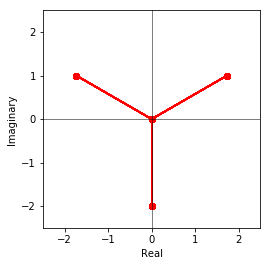

In [7]:
# . . Let's define a function that can be called (and used in the lab!)
def argand(a):
    import matplotlib.pyplot as plt
    import numpy as np
    for x in range(len(a)):
        plt.plot([0,a[x].real],[0,a[x].imag],'ro-',label='python')
    limit=np.max(np.ceil(np.absolute(a))) # set limits for axis
    plt.ylabel('Imaginary')
    plt.xlabel('Real')
    plt.axis('square')

    # . . Draw horizontal and vertical axes
    plot([0,0],[-6,6],'k',linewidth=0.5)
    plot([-6,6],[0,0],'k',linewidth=0.5)

    
nn = np.arange(0,100,1)
a = 2*(np.cos(np.pi*(1/6+2/3*nn)) + 1j*np.sin(np.pi*(1/6+2/3*nn)))
argand(a)
plt.xlim((-2.5,2.5))
plt.ylim((-2.5,2.5))
plt.show()

In fact, there are only three distinct answers!  This should not be surprising since $z^3=8i$ is a [cubic equation](https://en.wikipedia.org/wiki/Cubic_function) and therefore we should expect exactly three solutions.

### QUICK PROBLEMS

(10) Solve the following equations and show the answers on an Argand diagram:

   * $z^2+4=0$

   * $z^3-8=0$

   * $z^4=81(1+i)/\sqrt{2}$

   * $z^3+i=0$

   * $z^6=-64$

# Complex Functions

Complex analysis is concerned with complex functions that are differentiatable in some defined domain.  However, we should define what we mean by **complex function**.  A function $f$ on a complex domain $S$ assigns to every $z \in S$ a complex number $w$ called the value of $f$ at $z$:

$$ w = f(z) \tag{23}$$

For example, $w = f(z) = z^2+3z$ is a complex function defined for all of $z$, such that the domain $S$ is the whole complex plane.  Generally speaking, $w$ is itself a complex number, $w = u+iv$, where both $u$ and $v$ can be dependent on $z=x+iy$.  Thus, we write:

$$w = f(z) = u(x,y) + iv(x,y) \tag{24}$$

where $u(x,y)$ and $v(x,y)$ are functions of two real variables.

** EXAMPLE **

**Q1:** If $w=f(z)=z^2$, what are the associated $u(x,y)$ and $v(x,y)$?

**A1:** Because $z=x+iy$ we may write the following:

$$w = z^2 = (x+iy)^2 = x^2+2ixy+(iy)^2 = x^2-y^2 + 2ixy$$

Therefore, by inspection we see that $u(x,y) = x^2-y^2$ and $v(x,y) = 2xy$.

## Limits and Continuity

A function $f(z)$ is said to have the **limit** $l$ as $z$ approaches some $z_0$:

$$ \lim_{z\rightarrow z_0} f(z) = l, \tag{25}$$

if and only if $f$ is defined in a neighbourhood of $z_0$ and if the values of $f$ are "close" to $l$ for all $z$ "close" to $z_0$. More precisely, in the disk $|z-z_0|<\delta$ we have $|f(z)-l|<\epsilon$.  This is similar to how limits are defined in the calculus of 1D real variables; however, one big difference is that $z$ may approach $z_0$ **from any direction** (i.e., in $\theta$, not just from the left (-) and right (+) along the real axis).  

A function $f(z)$ is said to be **continuous** at $z=z_0$ if and only if $f(z_0)$ is defined and 

$$\lim_{z\rightarrow z_0} f(z) = f(z_0). \tag{26}$$

$f(z)$ is said to be **continuous in a domain** if it is continuous at each point in the domain.

** EXAMPLE **

**Q1:** Is $f(z)=\sum_{n=1}^{10} z^n$ continuous at $z=0$?

**A1:** Let's look at the following limit:

$$\lim_{z\rightarrow 0}\sum_{n=1}^{10} z^n  = \lim_{r\rightarrow 0}\sum_{n=1}^{10} (re^{i\theta })^n = \lim_{r\rightarrow 0}\sum_{n=1}^{10} r^ne^{in\theta }=0.$$

Thus, because the limit approaches $l=0$, the function is continuous at $z=0$.

### QUICK PROBLEMS

(11) Find out (and give a reason) whether $f(z)$ is continuous at $z=0$ if $f(0)=0$ and for $z\neq0$ the function is equal to:
   * $\frac{\Im{(z)}}{(1-|z|)}$ 
   
   
   * $\frac{\Im{(z^2)}}{|z|^2}$
   
(Hint: Use the polar notation, assert $r\rightarrow 0$ and see if this is valid for all $\theta$).

## Derivative of complex function

**Provided that the limit exists**, the **derivative** of a complex function $f$ at a point $z_0$ is written $f^\prime(z_0)$ and is defined by

$$f^\prime(z_0) = \lim_{\Delta z\rightarrow 0} \frac{f(z_0+\Delta z)-f(z_0)}{\Delta z}. \tag{28} $$

Then $f(z)$ is said to be **differentiable** at $z_0$.  If we write $\Delta z = z-z_0$ then we can change the limit argument and denominator as follows:

$$f^\prime(z_0) = \lim_{z\rightarrow z_0} \frac{f(z_0+\Delta z)-f(z_0)}{z-z_0}. \tag{29}$$

Note that differentiability of $f$ at $z_0$ requires along whatever path $z$ approaches $z_0$ the expressions always approaches a certain value and that all these values are equal.

**Q1**: Is the function $f(z)=z^2$ differentiable for all $z$? If yes, what is its derivative?. 

**A1:** The function $f(z)=z^2$ is differentiable for all $z$ and has the derivative $f^\prime(z)=2z$ because:

$$ f^\prime(z) = \lim_{\Delta z\rightarrow 0} \frac{ (z+\Delta z)^2 -z^2 }{\Delta z} = \lim_{\Delta z\rightarrow 0} \frac{ z^2+2z\Delta z +\Delta z^2 -z^2 }{\Delta z}= \lim_{\Delta z\rightarrow 0} \left(2z +\Delta z\right) = 2z. \tag{30}$$

**Q2**: Is the function $f(z)=\overline{z}$ differentiable for all $z$? If yes, what is its derivative?. 

**A2:** The function $f(z)=\overline{z}$ is not differentiable because:

$$ \frac{f(z+\Delta z)-f(z)}{\Delta z} = \frac{\overline{z+\Delta z}-\overline{z}}{\Delta z} =\frac{\overline{\Delta z}}{\Delta z} = \frac{\Delta x - i\Delta y}{\Delta x + i \Delta y}. \tag{31}$$

If $\Delta y=0$ and we approach $z_0$ along $\Delta x$ then this expression is equal to $1$; however, if $\Delta x=0$ and we approach $z_0$ along $\Delta y$ then the expression is $-1$.  Thus, the limit does not exist and $\overline{z}$ is not differentiable.  

### QUICK PROBLEMS

(12) Are the following functions differentiable? If so, what is the derivative?:

   * $f(z) = \left(z^3 + i\right)^2 $
   
   
   * $f(z) =\frac{i}{(1-z)^2}$

## Analytic Functions

Complex analysis is concerned with the theory and application of [analytic functions](https://en.wikipedia.org/wiki/Analytic_function) - i.e., functions that are differentiable in some domain such that we can "do calculus".  An **analytic function** is said to be analytic in a domain $D$ if $f(z)$ is defined and differentiable at all points in $D$. The function $f(z)$ is said to be **analytic** at a point $z=z_0$ in D if f(z) is analytic in a neighbourhood of $z_0$.  

Importantly, non-negative integer powers $\{1, z, z^2, z^3, ...\}$ are analytic in the complex plane and so are [polynomials](https://en.wikipedia.org/wiki/Polynomial) of the form:

$$f(z) = c_0 + c_1z + c_2 z^2 + c_3z^3 + ... + c_nz^n = \sum_{n=0}^{N} c_n z^n. \tag{32} $$

The quotient of two polynomials $g(z)$ and $h(z)$:

$$f(z) = \frac{g(z)}{h(z)} \tag{33}$$

is called a [rational function](https://en.wikipedia.org/wiki/Rational_function).  Rational function $f(z)$ is analytic except at points where $h(z)=0$ [also called the poles of $f(z)$].  We also can assume that many common factors of of $g$ and $h$ cancel out.  Rational functions will be quite important in the context of designing filters in the later sections of this course (Topics 6 and 7).

## Cauchy-Riemann Equations

Finally, we are going to conclude this overview of complex numbers with a brief discussion of the [Cauchy-Riemann equations](https://en.wikipedia.org/wiki/Cauchy%E2%80%93Riemann_equations), which are arguably the most important equations in [complex analysis](https://en.wikipedia.org/wiki/Complex_analysis).  They provide a test criterion for the analycity of a complex function $w=f(z)= u(x,y)+iv(x,y)$.  Roughly, $f$ is analytic in a domain $D$ if and only if the first partial derivatives of $u$ and $v$ satisfy the two Cauchy-Riemann equations

$$\begin{eqnarray}
\frac{\partial u}{\partial x} &=& \frac{\partial v}{\partial y}, \tag{34a}\\
\frac{\partial u}{\partial y} &=&-\frac{\partial v}{\partial x}, \tag{34b}\\
\end{eqnarray}$$

everywhere in domain $D$.  

**Q1**: Show that $f(z)=z^2$ is analytic for all $z$. 

**A1:** First, we observe that $z^2 =x^2-y^2+i2xy$ and thus $u = x^2-y^2$ and $v=2xy$.  We then apply the Cauchy-Riemann test: 

$$\begin{eqnarray}
\frac{\partial u}{\partial x} = 2x, &\quad \, \quad & \frac{\partial u}{\partial y}=-2y, \tag{35a}\\
\frac{\partial v}{\partial x} = 2y, &\quad\,\quad & \frac{\partial v}{\partial y}=2x.
\tag{35b}\\
\end{eqnarray}$$

Thus, $f(z)=z^2$ satifies the Cauchy-Riemann equations and is analytic for all of $z$.

### QUICK PROBLEMS

(13) Determine whether the following functions are analytic:
   
   * $f(z) = z^4$
   
   
   * $f(z) = e^{2x}\left(\mathrm{cos}\, y + i  \,\mathrm{sin} \, y\right)$